# Churn Prediction in Telecom Industry using Logistic Regression


In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [2]:
data_churn = pd.read_csv("Telco-Customer-Churn.csv")

In [3]:
data_churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
data_churn.shape

(7043, 21)

In [5]:
data_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
data_churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
data_churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
data_churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
#Find the duplicates

data_churn.duplicated().sum()

0

In [10]:
data_churn.TotalCharges = pd.to_numeric(data_churn.TotalCharges, errors='coerce')
data_churn.isnull().sum() 

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
#Removing missing values
data_churn.dropna(inplace = True)

#Customer ID removing
df=data_churn.iloc[:,1:]

#converting the predictor variable in binary form(0,1)

df['Churn'].replace(to_replace='Yes', value=1, inplace= True)
df['Churn'].replace(to_replace='No', value=0,inplace= True)
df['Churn'].head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [12]:
data_churn.isnull().sum() 

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
#converting all the categorial variable into dummy variables
df_dummy= pd.get_dummies(df)
df_dummy.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [14]:
df_dummy.dtypes

SeniorCitizen                                int64
tenure                                       int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
gender_Female                                uint8
gender_Male                                  uint8
Partner_No                                   uint8
Partner_Yes                                  uint8
Dependents_No                                uint8
Dependents_Yes                               uint8
PhoneService_No                              uint8
PhoneService_Yes                             uint8
MultipleLines_No                             uint8
MultipleLines_No phone service               uint8
MultipleLines_Yes                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No                           uint8
OnlineSecurity_No              

## Exploratory Data Analysis(EDA)

<AxesSubplot:>

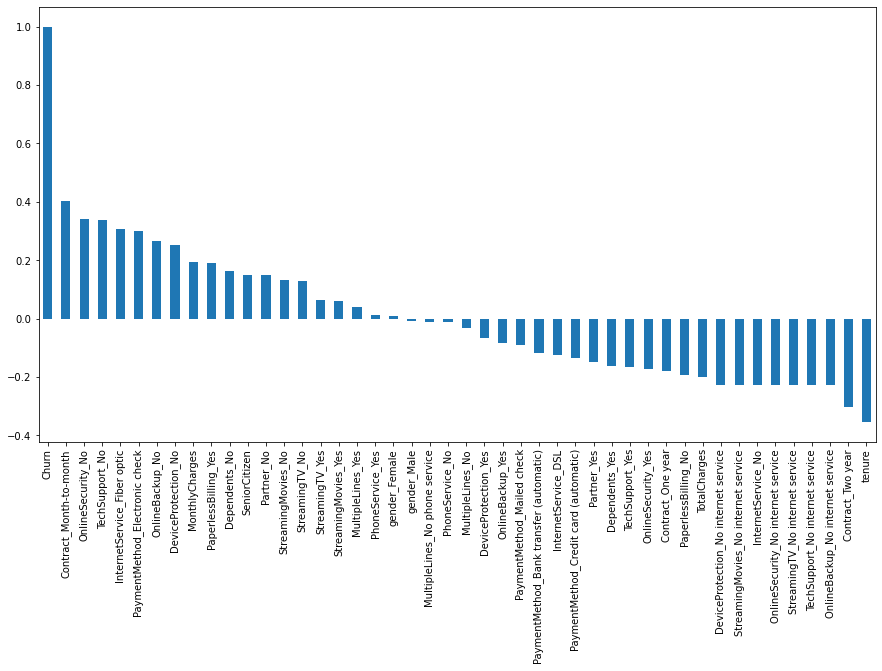

In [15]:
#get correlation of the churn with other variables
plt.figure(figsize=(15,8))
df_dummy.corr()['Churn'].sort_values(ascending= False).plot(kind= 'bar')

### Gender Distribution

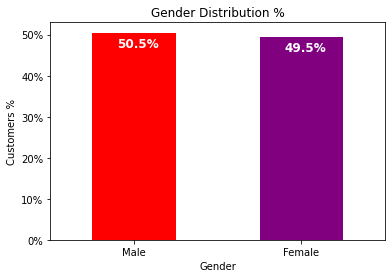

In [16]:
colors =['red','purple']
gen= (data_churn['gender'].value_counts()*100.0 / len(data_churn)).plot(kind= 'bar', stacked= True, rot= 0, color=colors)
gen.yaxis.set_major_formatter(mtick.PercentFormatter())
gen.set_ylabel('Customers %')
gen.set_xlabel('Gender')
gen.set_title('Gender Distribution %')

total=[]

for i in gen.patches:
    total.append(i.get_width())

total=sum(total)

for i in gen.patches:
    gen.text(i.get_x()+.15,i.get_height()-3.5, str(round((i.get_height()/total),1))+'%', fontsize=12, color='white',weight= 'bold' )

### Senior Citizens

Text(0, 0.5, 'Senior Citiizens')

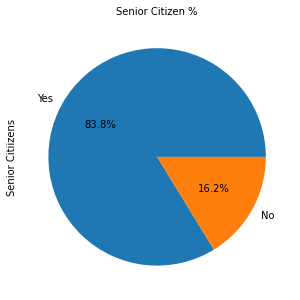

In [17]:
gen =(data_churn['SeniorCitizen'].value_counts()*100.0/ len(data_churn)).\
plot.pie(autopct='%.1f%%', labels= ['Yes', 'No'], figsize=(5,5) , fontsize= 10)
gen.set_title('Senior Citizen %', fontsize= 10)
gen.set_ylabel('Senior Citiizens', fontsize=10)

### Tenure

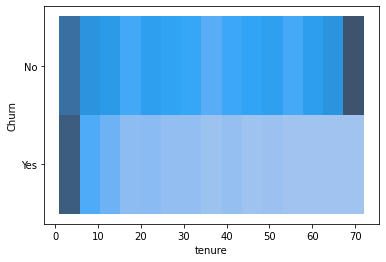

In [18]:
sns.histplot(x = 'tenure', y = 'Churn', data = data_churn)
plt.show()

### Number of Contracts

Text(0.5, 0, 'Contract type')

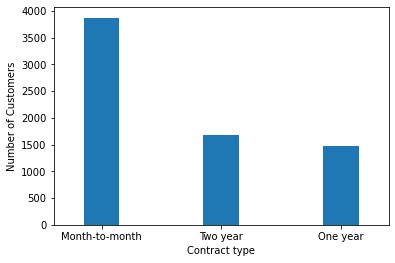

In [19]:
gen = data_churn['Contract'].value_counts().plot(kind = 'bar', rot = 0, width = 0.3)
gen.set_ylabel('Number of Customers')
gen.set_xlabel('Contract type')

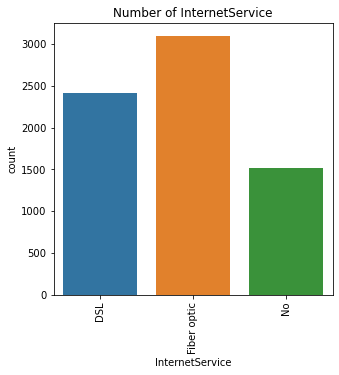

In [20]:
# visualization of InternetService
plt.figure(figsize=(5,5))
sns.countplot(x='InternetService',data=df)
plt.xticks(rotation=90)
plt.title('Number of InternetService')
plt.show()

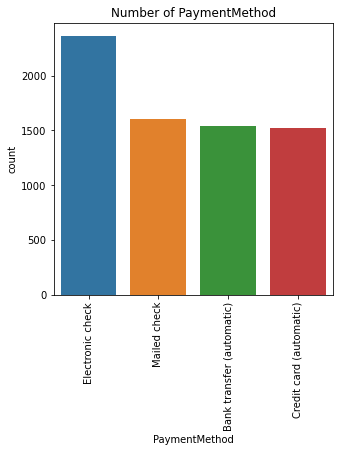

In [21]:
# visualization of PaymentMethod
plt.figure(figsize=(5,5))
sns.countplot(x='PaymentMethod',data=df)
plt.xticks(rotation=90)
plt.title('Number of PaymentMethod')
plt.show()

<AxesSubplot:xlabel='Churn', ylabel='count'>

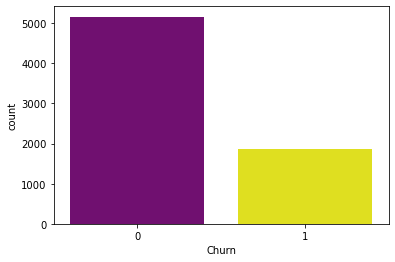

In [22]:
# Visualizing Churn
sns.countplot(data=df,x='Churn',palette=['purple','yellow'] )

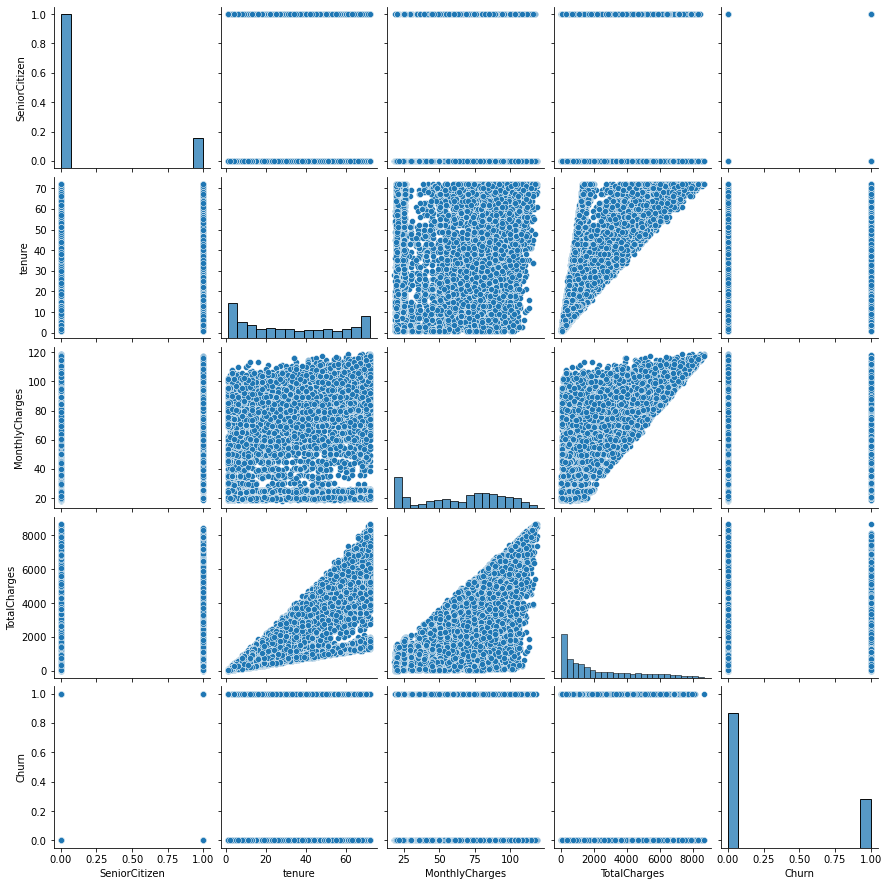

In [23]:
sns.pairplot(df)

In [24]:
# find the pairwise correlation of all columns
df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
SeniorCitizen,1.000000,0.015683,0.219874,0.102411,0.150541
tenure,0.015683,1.000000,0.246862,0.825880,-0.354049
MonthlyCharges,0.219874,0.246862,1.000000,0.651065,0.192858
TotalCharges,0.102411,0.825880,0.651065,1.000000,-0.199484
Churn,0.150541,-0.354049,0.192858,-0.199484,1.000000


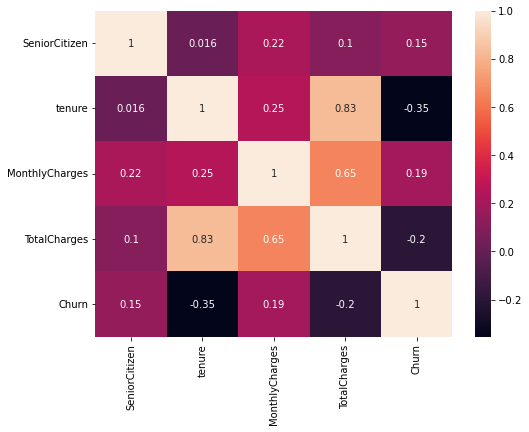

In [25]:
#Correlation plot

corr_df = df.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

### Comparision between Churn & Tenure

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

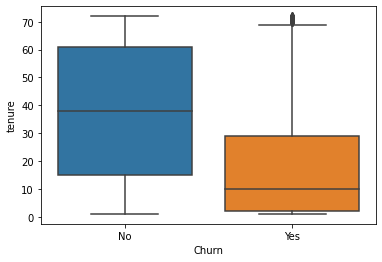

In [26]:
sns.boxplot(x= data_churn.Churn, y = data_churn.tenure)

### Churn according to monthly charges

Text(0, 0.5, 'Density')

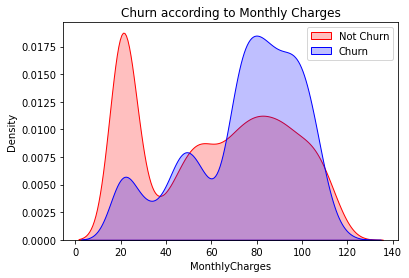

In [27]:
ax= sns.kdeplot(data_churn.MonthlyCharges[(data_churn['Churn']== 'No')],
                color='Red',fill=True)
ax= sns.kdeplot(data_churn.MonthlyCharges[(data_churn['Churn']=='Yes')],
                color = 'Blue',fill= True)

ax.set_title('Churn according to Monthly Charges')
ax.legend(['Not Churn','Churn'],loc='upper right')
ax.set_ylabel('Density')

## Modelling

### Logistic Regression Model

In [28]:
x= df_dummy.drop(columns =['Churn'])
y= df_dummy['Churn'].values

#Scaling all the variables to range 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = x.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(x)
x=pd.DataFrame(scaler.transform(x))
x.columns = features

In [29]:
#Creating test and train model
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=101)

In [30]:
#Running Logistic Regression Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result= model.fit(x_train,y_train)

In [31]:
from sklearn import metrics
prediction_test = model.predict(x_test)
print(metrics.accuracy_score(y_test,prediction_test))

0.8075829383886256


In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = result.predict(x_test)
print("Accuracy Score:", accuracy_score(y_test,y_pred))

Accuracy Score: 0.8075829383886256


In [33]:
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))

Confusion Matrix:
[[1418  162]
 [ 244  286]]


In [34]:
print("Classification report:")
print(classification_report(y_test,y_pred))

Classification report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1580
           1       0.64      0.54      0.58       530

    accuracy                           0.81      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.80      0.81      0.80      2110

